# Modelo de Desarrollo de Jugador

Este notebook implementa un sistema de ecuaciones diferenciales para simular
la evolución de los atributos de un jugador (Físico, Técnico, Mental) a lo largo del tiempo.

## Ecuaciones del Modelo
 
$$\frac{dF}{dt} = \alpha_F E_F e^{-\frac{(A-A_{opt})^2}{2\sigma^2}} - \beta_F \max(0, A-30)F$$

$$\frac{dT}{dt} = \alpha_T E_T + \gamma_{FT} F - \beta_T \max(0, A-32)T$$

$$\frac{dM}{dt} = \alpha_M E_M + \delta(F+T) - \beta_M \max(0, A-35)M$$
 
$$\frac{dR}{dt} = w_F \frac{dF}{dt} + w_T \frac{dT}{dt} + w_M \frac{dM}{dt} + \epsilon$$
 
$$\frac{dA}{dt} = \frac{1}{365}$$

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from player_development_model import (
    PlayerDevelopmentModel, 
    PlayerParameters,
    plot_results,
    constant_training,
    adaptive_training
)

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 10)

## 1. Configuración de Parámetros del Modelo

In [32]:
# Crear parámetros personalizados
params = PlayerParameters(
    # Tasas de aprendizaje
    alpha_F=0.004,
    alpha_T=0.003,
    alpha_M=0.002,
    
    # Tasas de decaimiento
    beta_F=0.008,
    beta_T=0.006,
    beta_M=0.005,
    
    # Sinergias
    gamma_FT=0.005,
    delta=0.003,
    
    # Pesos en el rating
    w_F=0.33,
    w_T=0.33,
    w_M=0.33,
    
    # Edad óptima
    A_opt=28.0,
    sigma=2.0
)

In [33]:
# Crear modelo
model = PlayerDevelopmentModel(params)

## 2. Escenario 1: Desarrollo con Entrenamiento Constante

In [34]:
# Estado inicial: jugador prometedor de 18 años
initial_state_1 = {
    'F': 0.90,  # Físico inicial bueno
    'T': 0.30,  # Técnico en desarrollo
    'M': 0.40,  # Mental inicial bajo (típico de jóvenes)
    'A': 18.0
}

In [35]:
training_1 = constant_training(E_F=0.8, E_T=0.8, E_M=0.6)

# Simular 5 años
results_1 = model.simulate(
    initial_state=initial_state_1,
    training_schedule=training_1,
    duration_days=5 * 365,
    dt=1.0
)

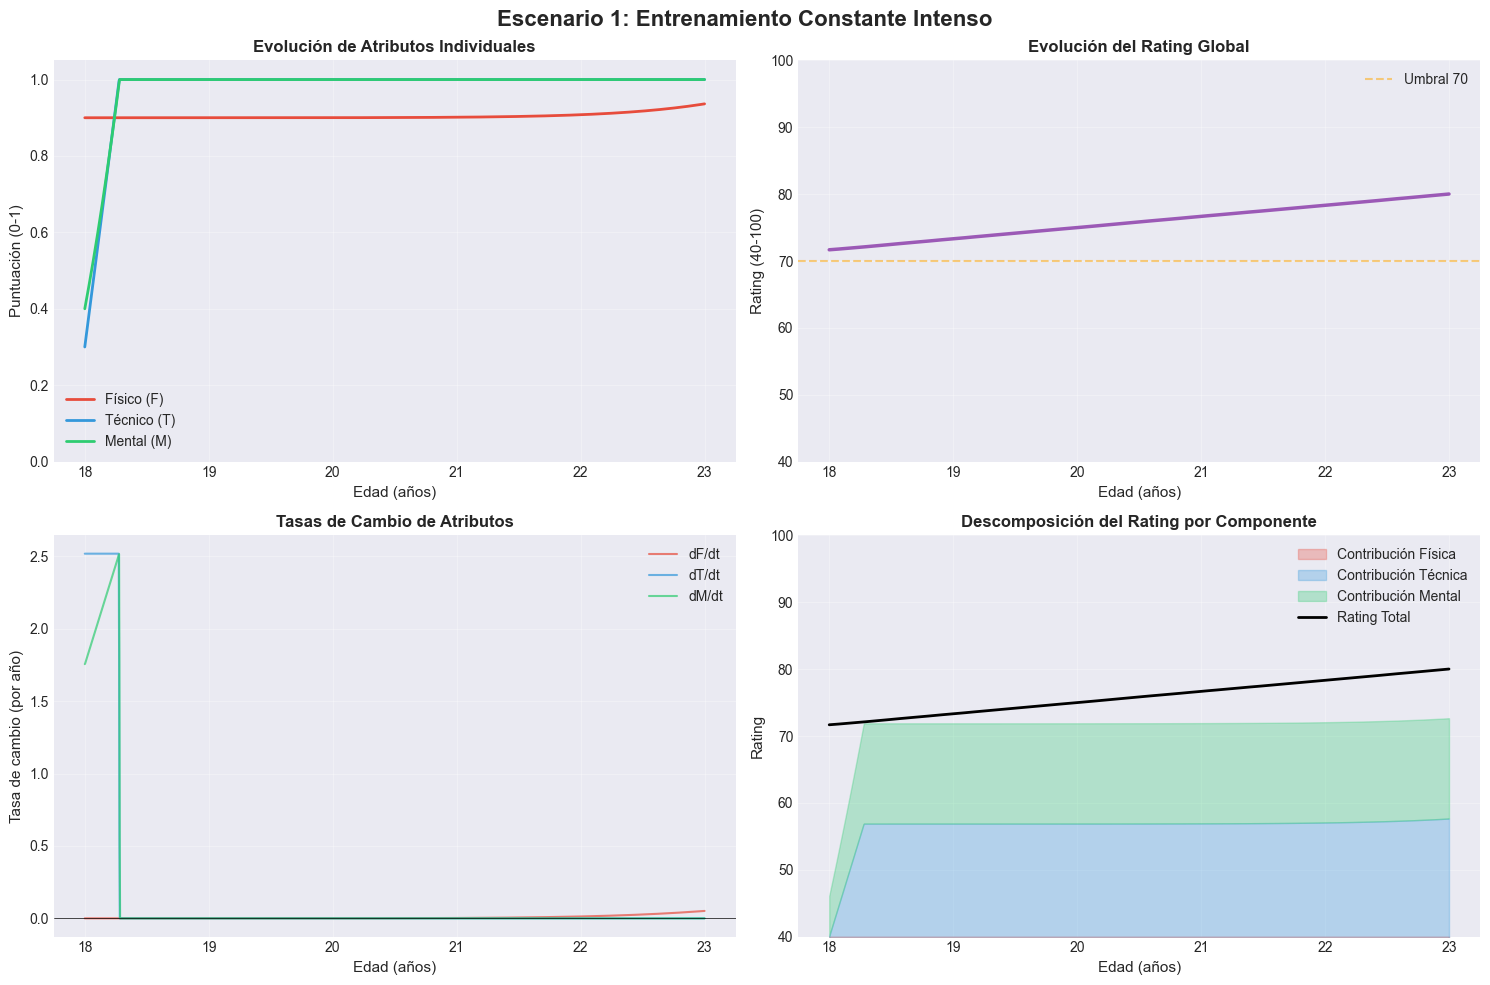

In [36]:
# Visualizar
fig1 = plot_results(results_1)
plt.suptitle('Escenario 1: Entrenamiento Constante Intenso', fontsize=16, fontweight='bold')
plt.tight_layout()

## 3. Escenario 2: Desarrollo con Entrenamiento Adaptativo

In [37]:
# Mismo estado inicial
initial_state_2 = {
    'F': 0.90,
    'T': 0.30,
    'M': 0.40,
    'A': 18.0
}

In [38]:
# Entrenamiento adaptativo según edad
results_2 = model.simulate(
    initial_state=initial_state_2,
    training_schedule=adaptive_training,
    duration_days=5 * 365,
    dt=1.0
)

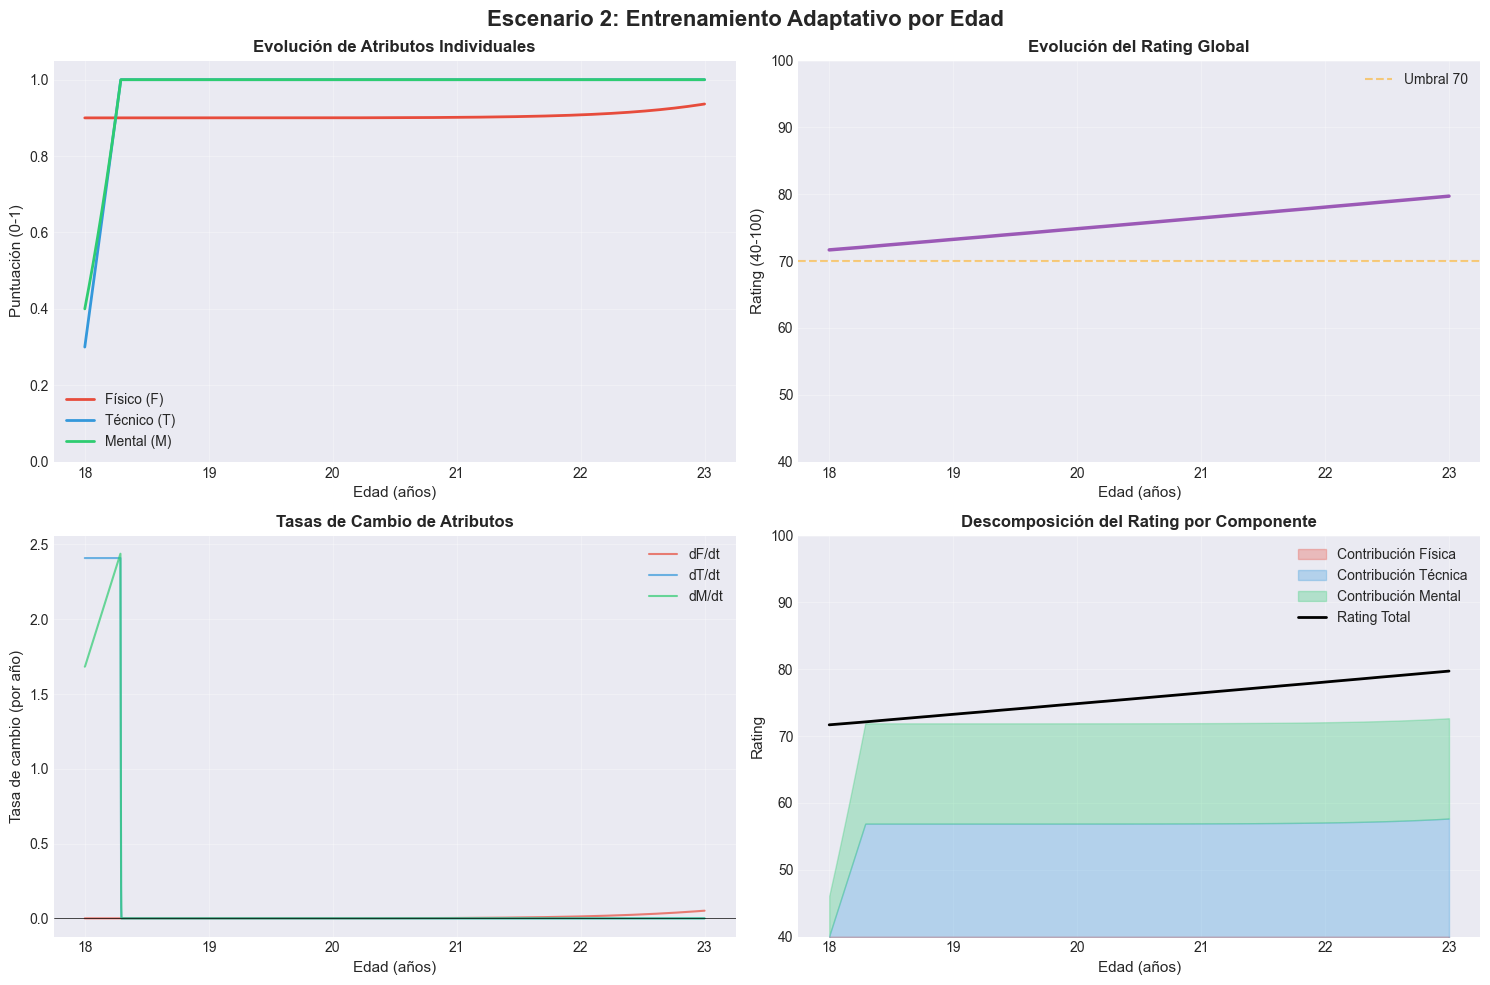

In [39]:
# Visualizar
fig2 = plot_results(results_2)
plt.suptitle('Escenario 2: Entrenamiento Adaptativo por Edad', fontsize=16, fontweight='bold')
plt.tight_layout()

## 4. Comparación de Escenarios

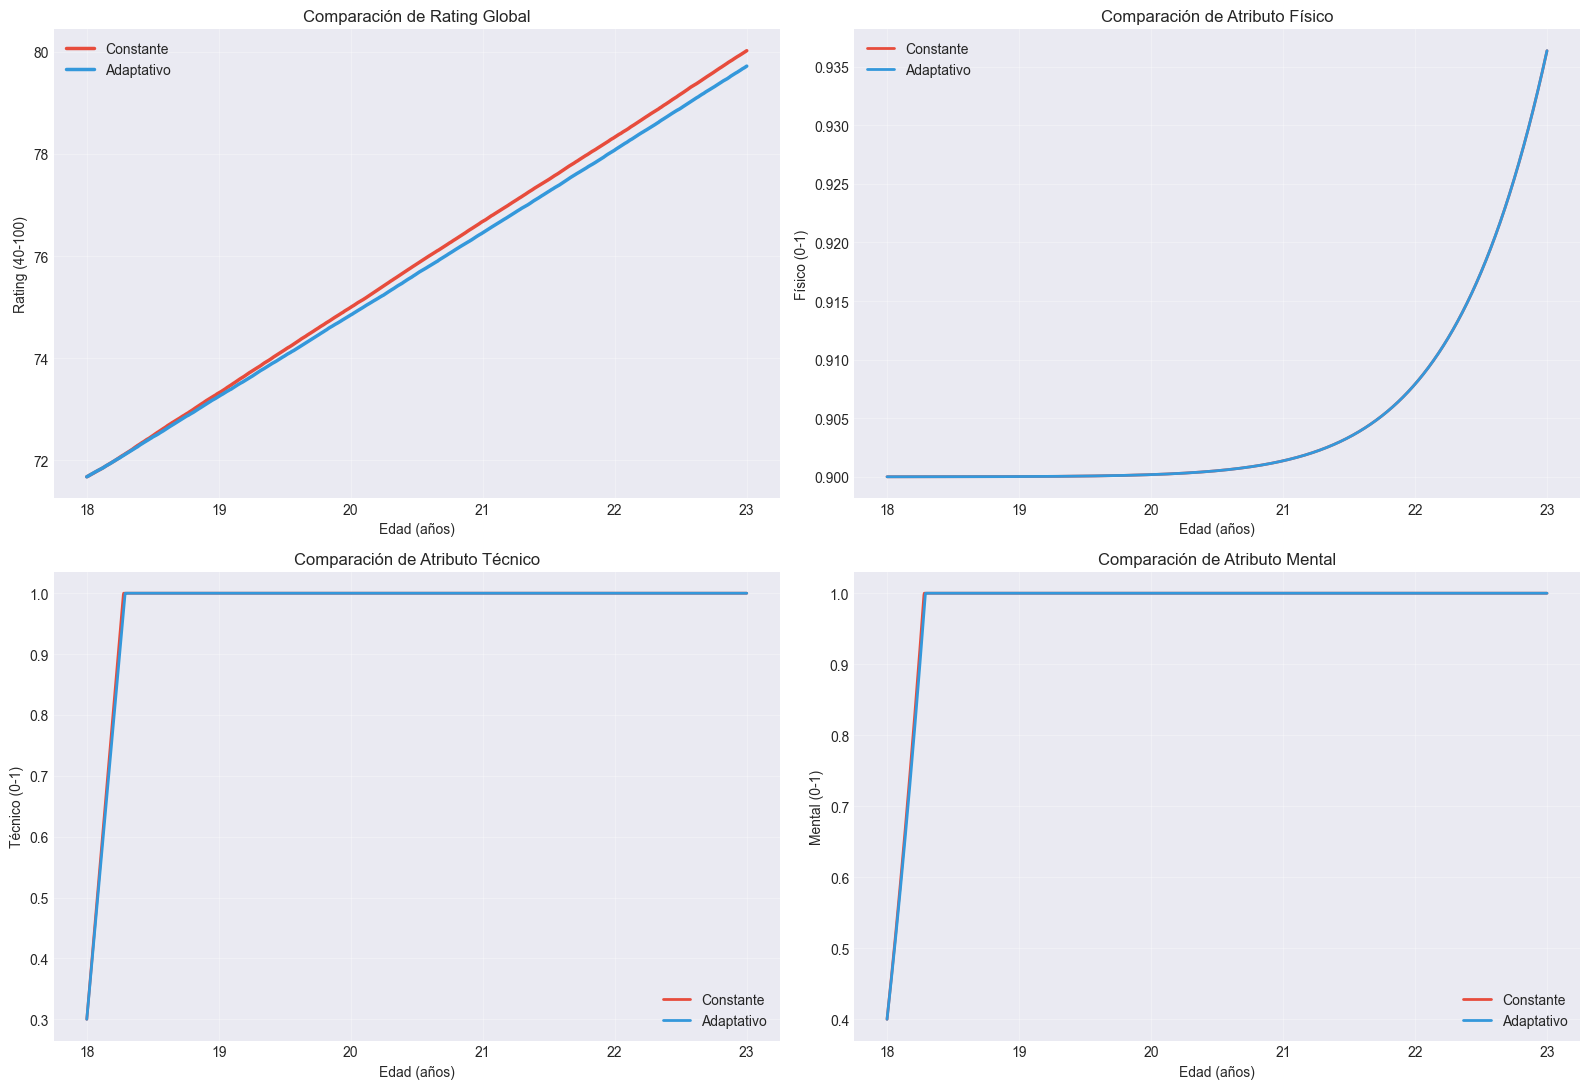

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(16, 11))

# Rating comparison
ax1 = axes[0, 0]
ax1.plot(results_1['Edad'], results_1['Rating (R)'], label='Constante', linewidth=2.5, color='#e74c3c')
ax1.plot(results_2['Edad'], results_2['Rating (R)'], label='Adaptativo', linewidth=2.5, color='#3498db')
ax1.set_xlabel('Edad (años)')
ax1.set_ylabel('Rating (40-100)')
ax1.set_title('Comparación de Rating Global')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Físico comparison
ax2 = axes[0, 1]
ax2.plot(results_1['Edad'], results_1['Físico (F)'], label='Constante', linewidth=2, color='#e74c3c')
ax2.plot(results_2['Edad'], results_2['Físico (F)'], label='Adaptativo', linewidth=2, color='#3498db')
ax2.set_xlabel('Edad (años)')
ax2.set_ylabel('Físico (0-1)')
ax2.set_title('Comparación de Atributo Físico')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Técnico comparison
ax3 = axes[1, 0]
ax3.plot(results_1['Edad'], results_1['Técnico (T)'], label='Constante', linewidth=2, color='#e74c3c')
ax3.plot(results_2['Edad'], results_2['Técnico (T)'], label='Adaptativo', linewidth=2, color='#3498db')
ax3.set_xlabel('Edad (años)')
ax3.set_ylabel('Técnico (0-1)')
ax3.set_title('Comparación de Atributo Técnico')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Mental comparison
ax4 = axes[1, 1]
ax4.plot(results_1['Edad'], results_1['Mental (M)'], label='Constante', linewidth=2, color='#e74c3c')
ax4.plot(results_2['Edad'], results_2['Mental (M)'], label='Adaptativo', linewidth=2, color='#3498db')
ax4.set_xlabel('Edad (años)')
ax4.set_ylabel('Mental (0-1)')
ax4.set_title('Comparación de Atributo Mental')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('comparison_scenarios.png', dpi=300, bbox_inches='tight')

## 5. Análisis de Sensibilidad de Parámetros

In [41]:
def sensitivity_analysis(param_name, param_values, base_params):
    """Analiza cómo cambia el modelo variando un parámetro"""
    results_list = []
    
    for value in param_values:
        # Crear copia de parámetros base
        test_params = PlayerParameters(
            alpha_F=base_params.alpha_F,
            alpha_T=base_params.alpha_T,
            alpha_M=base_params.alpha_M,
            beta_F=base_params.beta_F,
            beta_T=base_params.beta_T,
            beta_M=base_params.beta_M,
            gamma_FT=base_params.gamma_FT,
            delta=base_params.delta,
            w_F=base_params.w_F,
            w_T=base_params.w_T,
            w_M=base_params.w_M,
            A_opt=base_params.A_opt,
            sigma=base_params.sigma
        )
        
        # Modificar el parámetro específico
        setattr(test_params, param_name, value)
        
        # Crear modelo y simular
        test_model = PlayerDevelopmentModel(test_params)
        initial = {'F': 0.6, 'T': 0.5, 'M': 0.4, 'A': 20.0}
        results = test_model.simulate(
            initial_state=initial,
            training_schedule=constant_training(0.8, 0.8, 0.6),
            duration_days=15 * 365,
            dt=7.0  # Paso semanal para mayor velocidad
        )
        
        results_list.append((value, results))
    
    return results_list

### Sensibilidad a la tasa de aprendizaje físico (α_F)

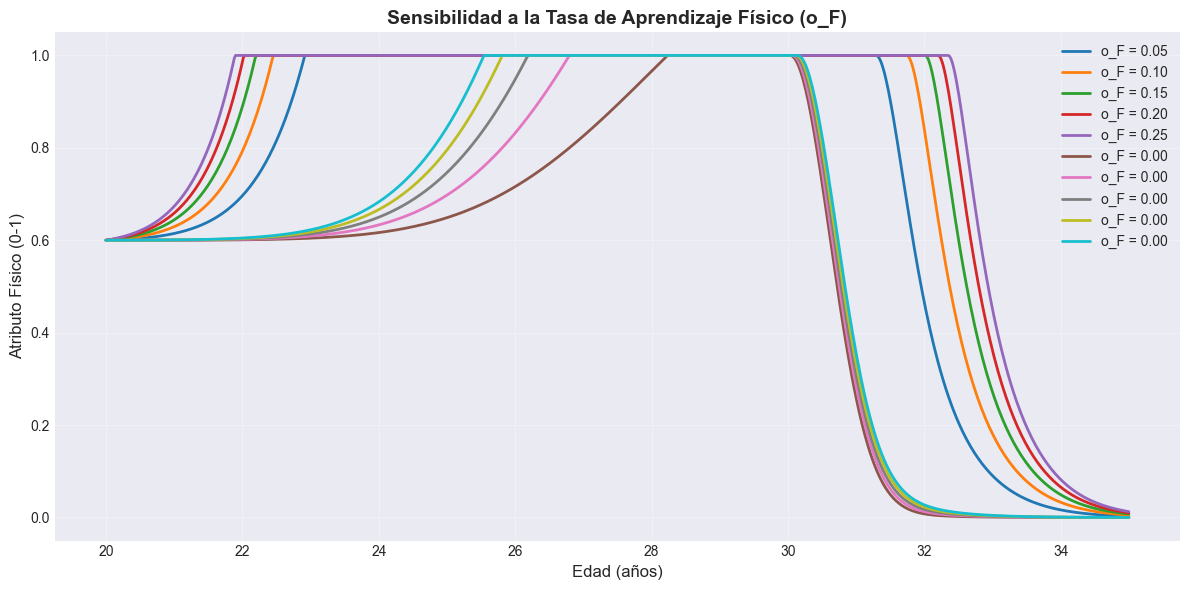

In [42]:
alpha_F_values = [0.05, 0.10, 0.15, 0.20, 0.25, 0.0005, 0.0010, 0.0015, 0.0020, 0.0025]
alpha_F_results = sensitivity_analysis('alpha_F', alpha_F_values, params)

plt.figure(figsize=(12, 6))
for value, results in alpha_F_results:
    plt.plot(results['Edad'], results['Físico (F)'], 
             label=f'o_F = {value:.2f}', linewidth=2)

plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Atributo Físico (0-1)', fontsize=12)
plt.title('Sensibilidad a la Tasa de Aprendizaje Físico (o_F)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('sensitivity_alpha_F.png', dpi=300, bbox_inches='tight')

### Sensibilidad a la edad óptima (A_opt)

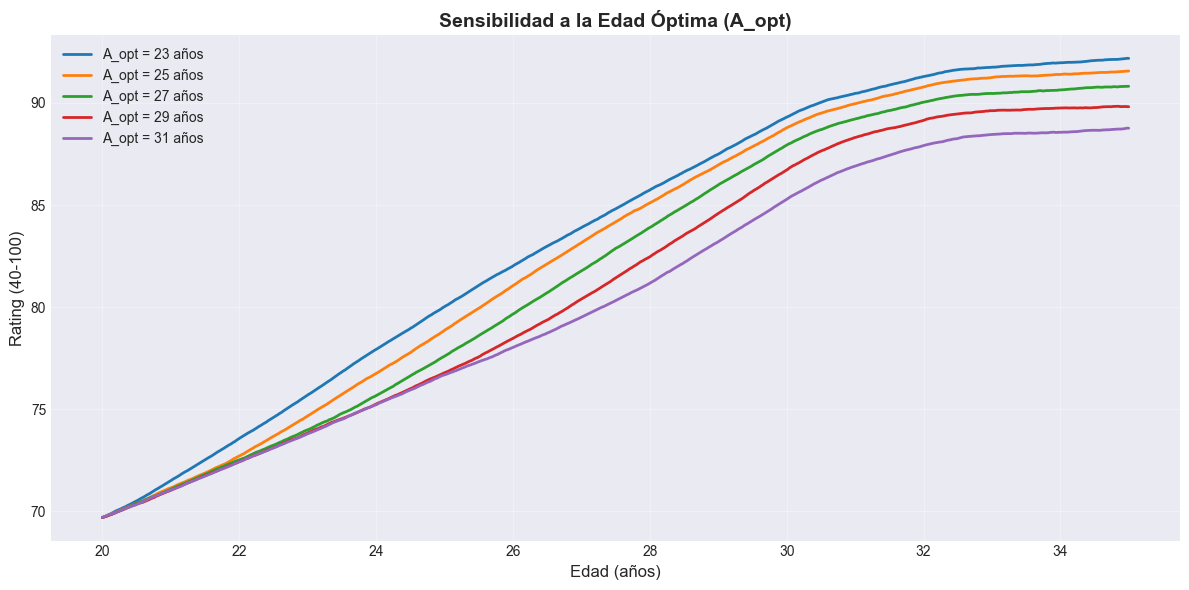

In [43]:
A_opt_values = [23, 25, 27, 29, 31]
A_opt_results = sensitivity_analysis('A_opt', A_opt_values, params)

plt.figure(figsize=(12, 6))
for value, results in A_opt_results:
    plt.plot(results['Edad'], results['Rating (R)'], 
             label=f'A_opt = {value:.0f} años', linewidth=2)

plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Rating (40-100)', fontsize=12)
plt.title('Sensibilidad a la Edad Óptima (A_opt)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('sensitivity_A_opt.png', dpi=300, bbox_inches='tight')

## 6. Análisis de Estrategias de Entrenamiento

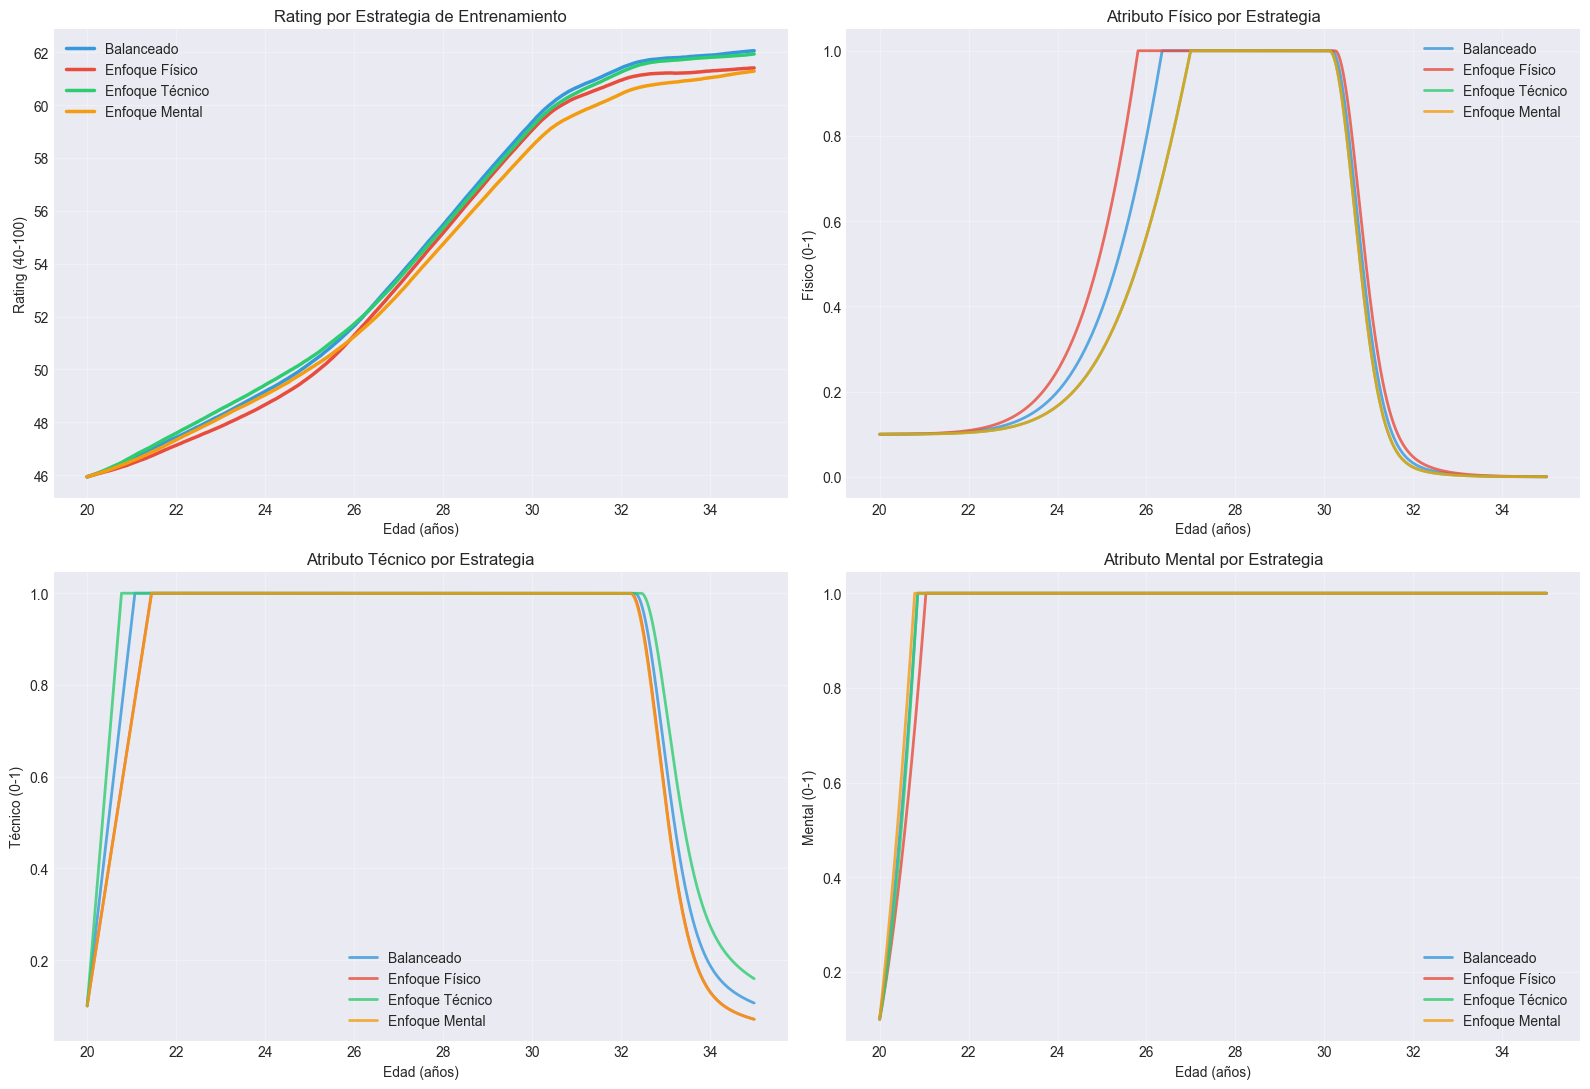

In [44]:
def balanced_training(age):
    """Entrenamiento balanceado en todas las áreas"""
    return (0.6, 0.6, 0.6)

def physical_focus(age):
    """Enfoque en desarrollo físico"""
    return (0.9, 0.4, 0.4)

def technical_focus(age):
    """Enfoque en desarrollo técnico"""
    return (0.4, 0.9, 0.4)

def mental_focus(age):
    """Enfoque en desarrollo mental"""
    return (0.4, 0.4, 0.9)

# Simular con diferentes estrategias
strategies = [
    ('Balanceado', balanced_training),
    ('Enfoque Físico', physical_focus),
    ('Enfoque Técnico', technical_focus),
    ('Enfoque Mental', mental_focus)
]

initial = {'F': 0.1, 'T': 0.1, 'M': 0.1, 'A': 20.0}
strategy_results = {}

for name, training_func in strategies:
    results = model.simulate(
        initial_state=initial,
        training_schedule=training_func,
        duration_days=15 * 365,
        dt=1.0
    )
    strategy_results[name] = results

# Graficar comparación
fig, axes = plt.subplots(2, 2, figsize=(16, 11))

colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

# Rating
ax1 = axes[0, 0]
for (name, _), color in zip(strategies, colors):
    ax1.plot(strategy_results[name]['Edad'], strategy_results[name]['Rating (R)'], 
             label=name, linewidth=2.5, color=color)
ax1.set_xlabel('Edad (años)')
ax1.set_ylabel('Rating (40-100)')
ax1.set_title('Rating por Estrategia de Entrenamiento')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Físico
ax2 = axes[0, 1]
for (name, _), color in zip(strategies, colors):
    ax2.plot(strategy_results[name]['Edad'], strategy_results[name]['Físico (F)'], 
             label=name, linewidth=2, color=color, alpha=0.8)
ax2.set_xlabel('Edad (años)')
ax2.set_ylabel('Físico (0-1)')
ax2.set_title('Atributo Físico por Estrategia')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Técnico
ax3 = axes[1, 0]
for (name, _), color in zip(strategies, colors):
    ax3.plot(strategy_results[name]['Edad'], strategy_results[name]['Técnico (T)'], 
             label=name, linewidth=2, color=color, alpha=0.8)
ax3.set_xlabel('Edad (años)')
ax3.set_ylabel('Técnico (0-1)')
ax3.set_title('Atributo Técnico por Estrategia')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Mental
ax4 = axes[1, 1]
for (name, _), color in zip(strategies, colors):
    ax4.plot(strategy_results[name]['Edad'], strategy_results[name]['Mental (M)'], 
             label=name, linewidth=2, color=color, alpha=0.8)
ax4.set_xlabel('Edad (años)')
ax4.set_ylabel('Mental (0-1)')
ax4.set_title('Atributo Mental por Estrategia')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_strategies_comparison.png', dpi=300, bbox_inches='tight')

## 7. Tabla Resumen de Resultados

In [45]:
# Crear tabla resumen
summary_data = []

for name in strategy_results.keys():
    results = strategy_results[name]
    peak_idx = results['Rating (R)'].idxmax()
    final_idx = len(results) - 1
    
    summary_data.append({
        'Estrategia': name,
        'Rating Inicial': results.loc[0, 'Rating (R)'],
        'Rating Pico': results.loc[peak_idx, 'Rating (R)'],
        'Edad Pico': results.loc[peak_idx, 'Edad'],
        'Rating Final': results.loc[final_idx, 'Rating (R)'],
        'F Final': results.loc[final_idx, 'Físico (F)'],
        'T Final': results.loc[final_idx, 'Técnico (T)'],
        'M Final': results.loc[final_idx, 'Mental (M)']
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.round(2)

print("\n" + "="*80)
print("TABLA RESUMEN: COMPARACIÓN DE ESTRATEGIAS DE ENTRENAMIENTO")
print("="*80)
print(summary_df.to_string(index=False))
print("="*80)

# Guardar tabla
summary_df.to_csv('training_strategies_summary.csv', index=False)


TABLA RESUMEN: COMPARACIÓN DE ESTRATEGIAS DE ENTRENAMIENTO
     Estrategia  Rating Inicial  Rating Pico  Edad Pico  Rating Final  F Final  T Final  M Final
     Balanceado           45.94        62.05      35.00         62.05      0.0     0.11      1.0
 Enfoque Físico           45.94        61.40      34.99         61.40      0.0     0.07      1.0
Enfoque Técnico           45.94        61.93      35.00         61.93      0.0     0.16      1.0
 Enfoque Mental           45.94        61.28      35.00         61.28      0.0     0.07      1.0


## 8. Conclusiones y Recomendaciones
 
Basándose en las simulaciones:

1. **Edad Óptima**: El modelo predice que el rendimiento máximo ocurre alrededor de los 27 años cuando A_opt=27

2. **Entrenamiento Adaptativo**: Ajustar la intensidad del entrenamiento según la edad produce mejores resultados a largo plazo

3. **Desarrollo Mental**: El atributo mental es menos susceptible al decaimiento por edad, haciéndolo crucial para carreras longas
 
4. **Sinergia**: Los efectos de sinergia (γ_FT y δ) permiten que el desarrollo físico impulse el técnico, y ambos impulsen el mental

5. **Estrategia Balanceada**: Un enfoque balanceado tiende a producir el rating general más alto y sostenible